In [86]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from joblib import dump

In [87]:
df = pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [88]:
print(f'The data has {df.shape[0]} rows as {df.shape[1]} columns')

The data has 1030 rows as 9 columns


### Null values check

In [89]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

#### Data no nulll values which is a good thing for us.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### All the columns present in the dataset are numeric columns.

In [91]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [92]:
df.columns = df.columns.str.strip()
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

#### There is a chance that outliers may present in few columns such as age superplasticizer etc.

## EDA ( Exploratory Data Analysis )

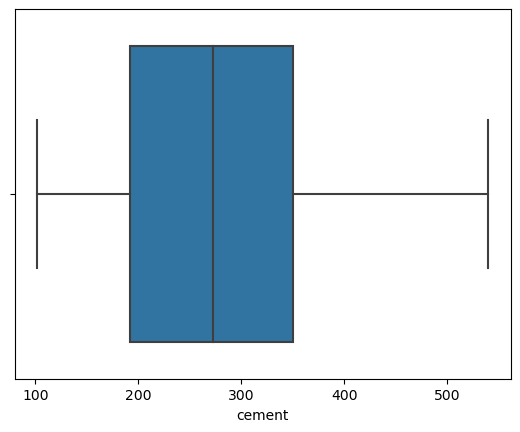

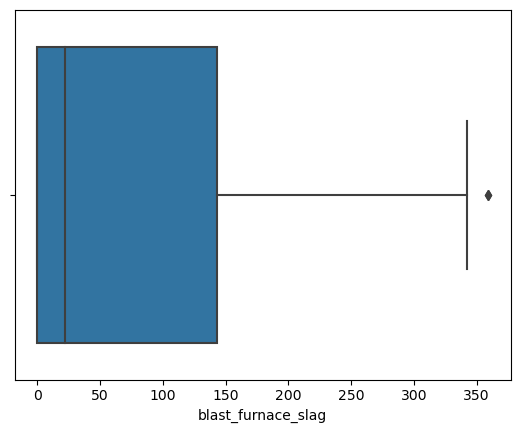

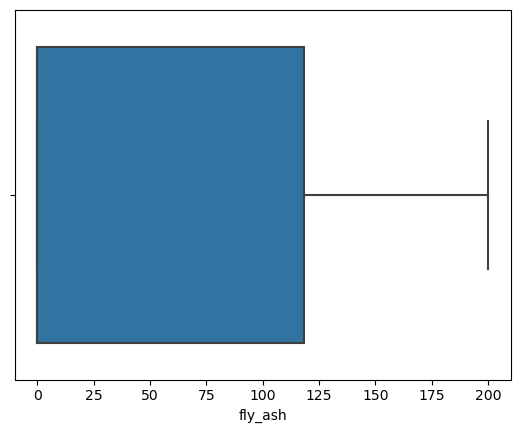

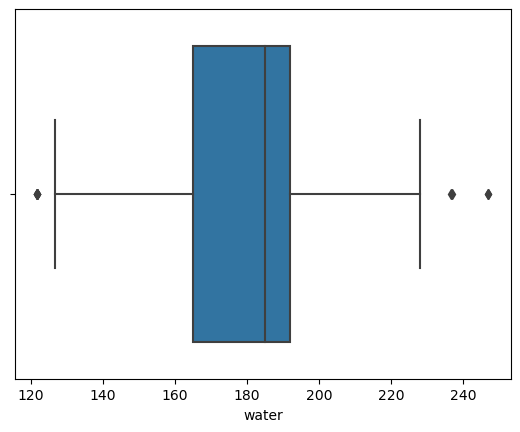

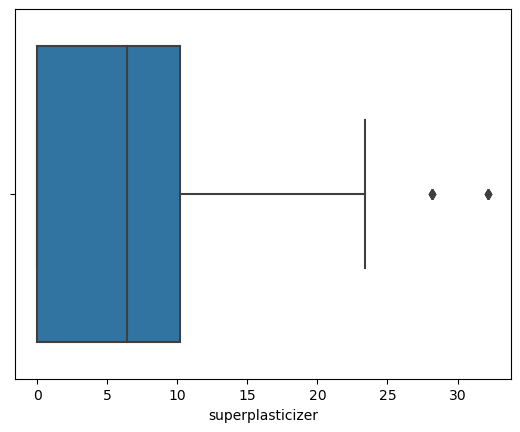

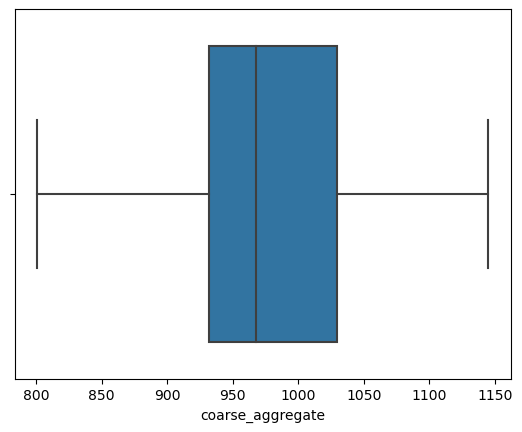

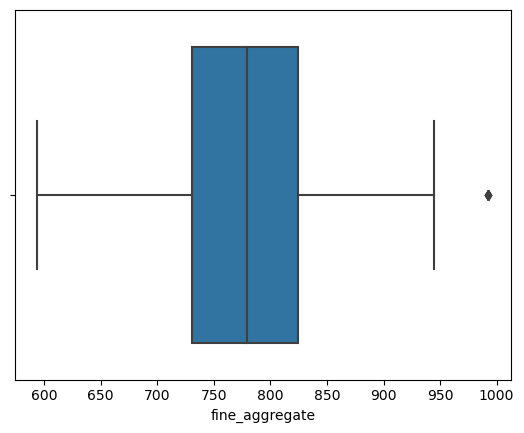

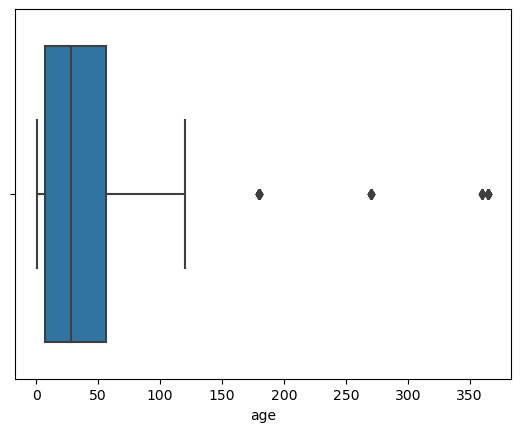

In [93]:
for col in df.columns[:-1]:
    sns.boxplot(x=df[col])
    plt.show()

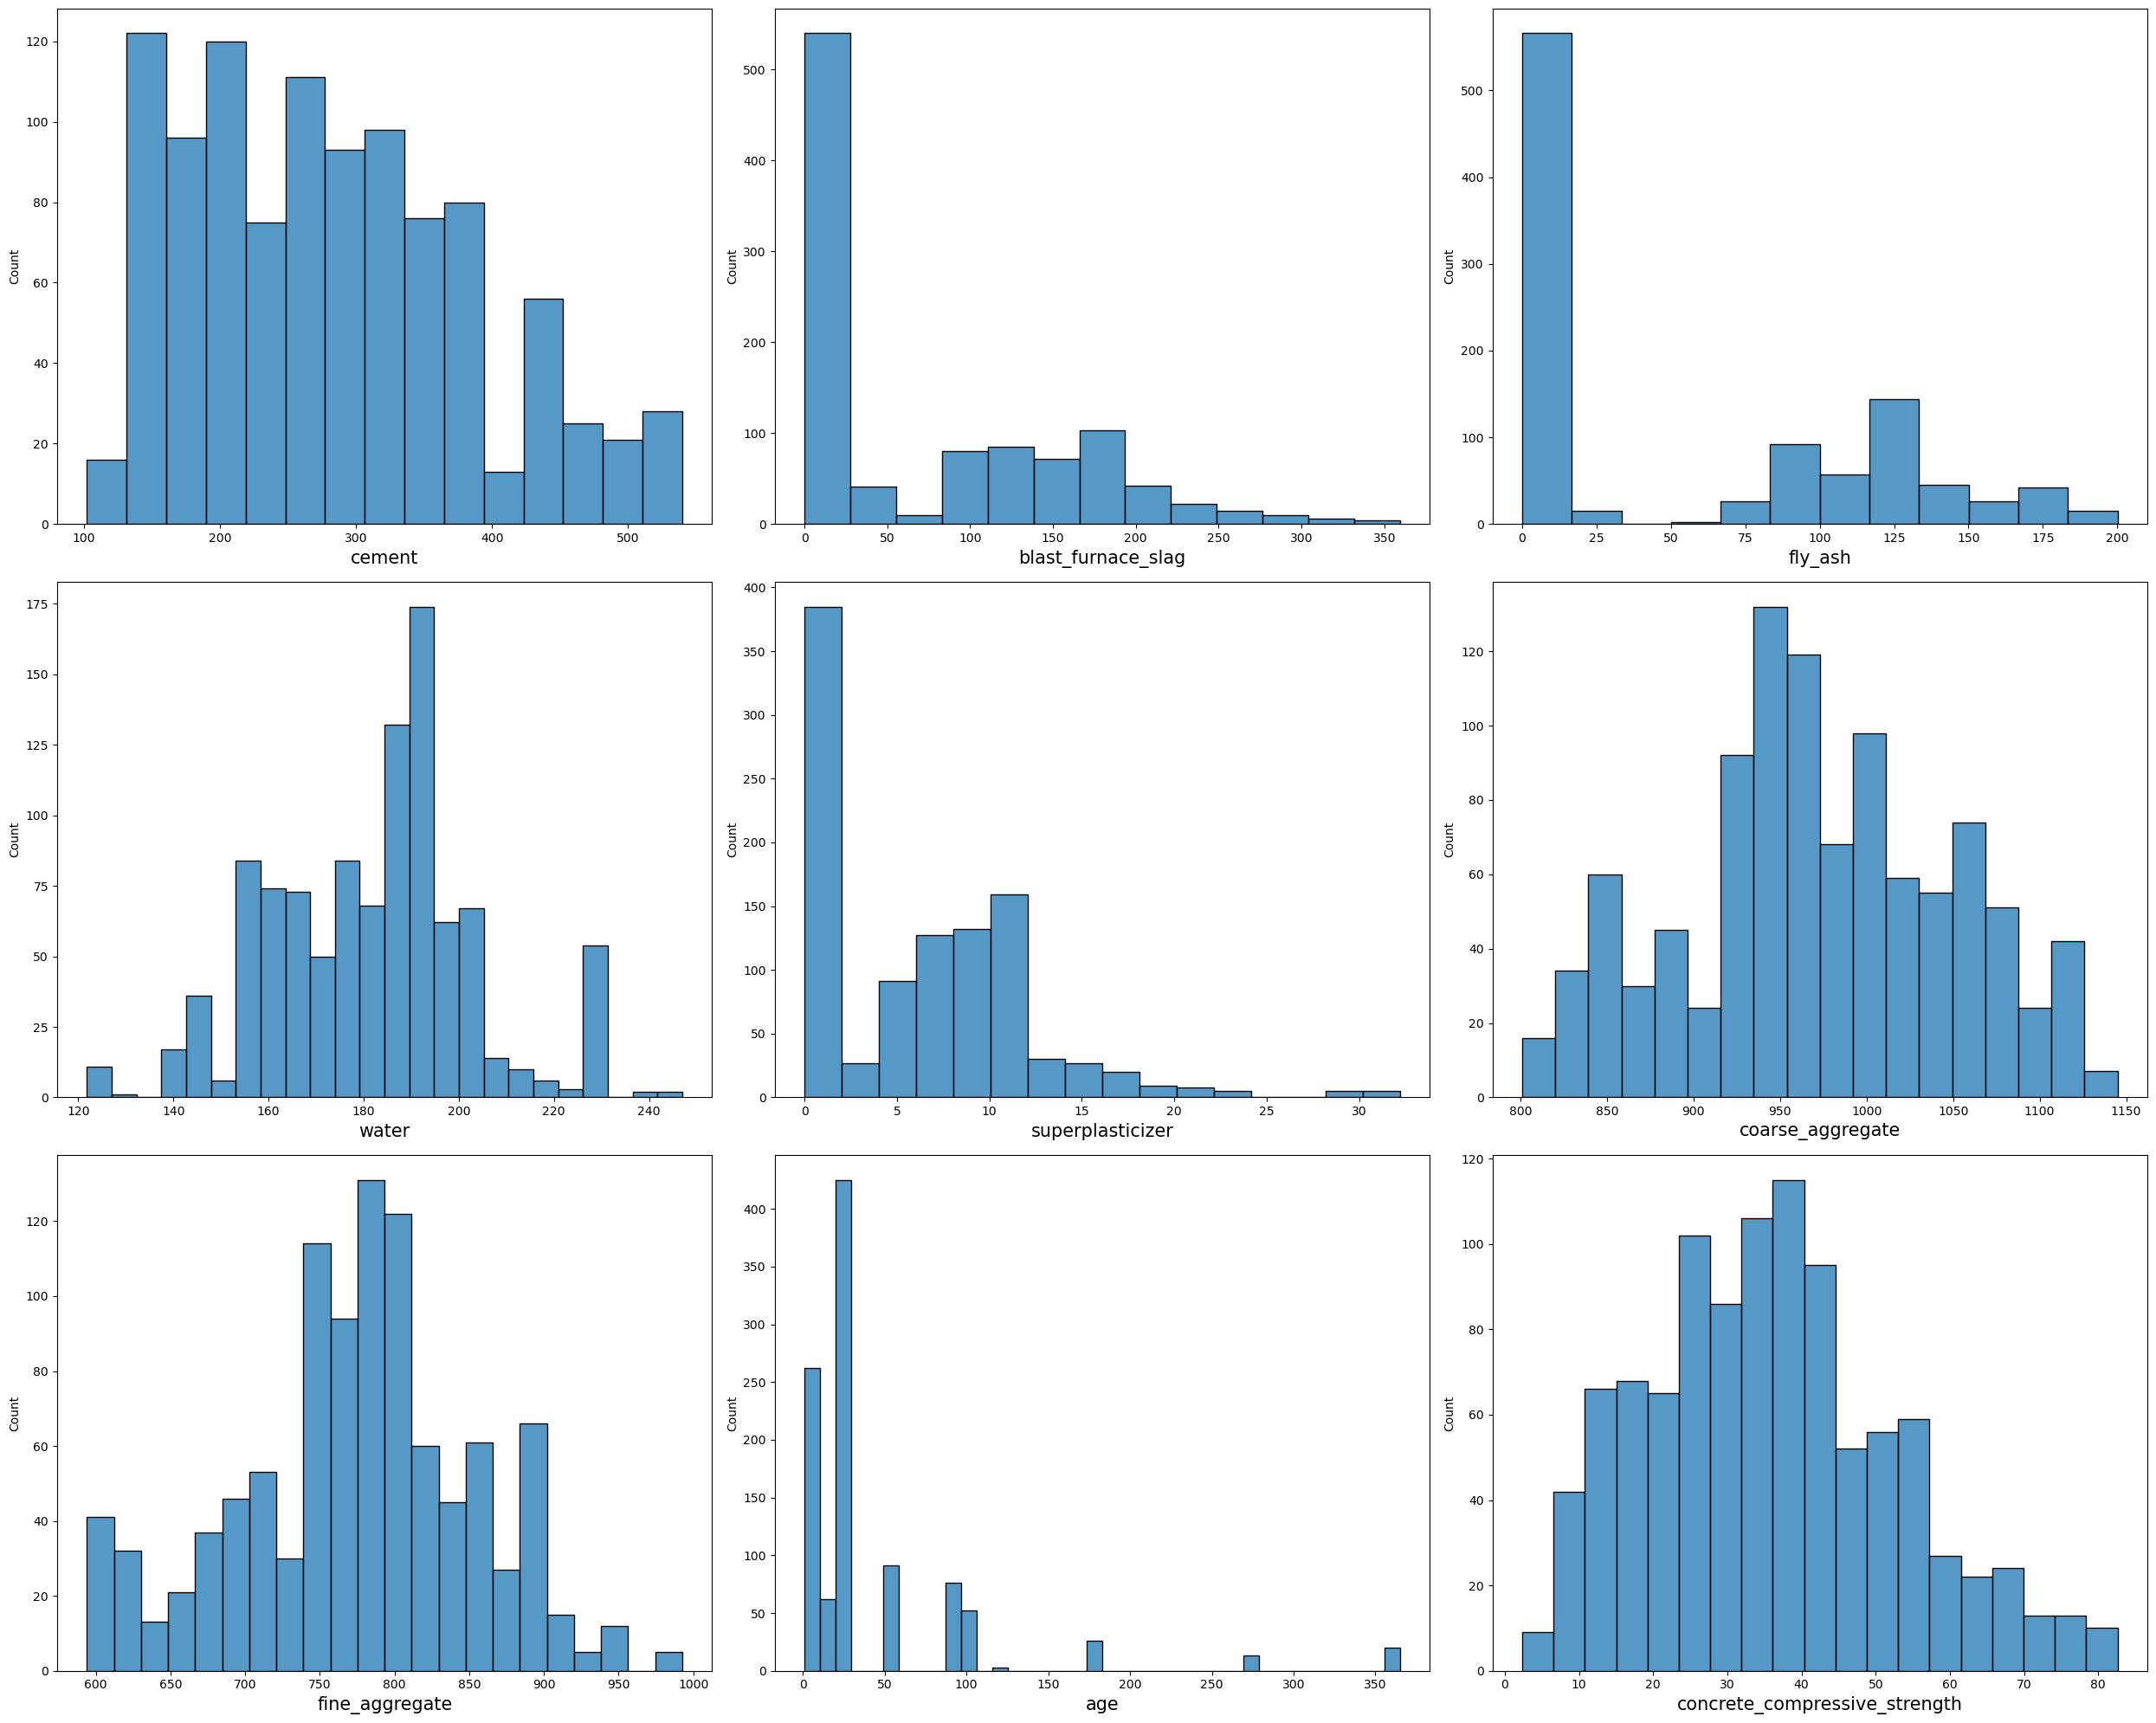

In [94]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

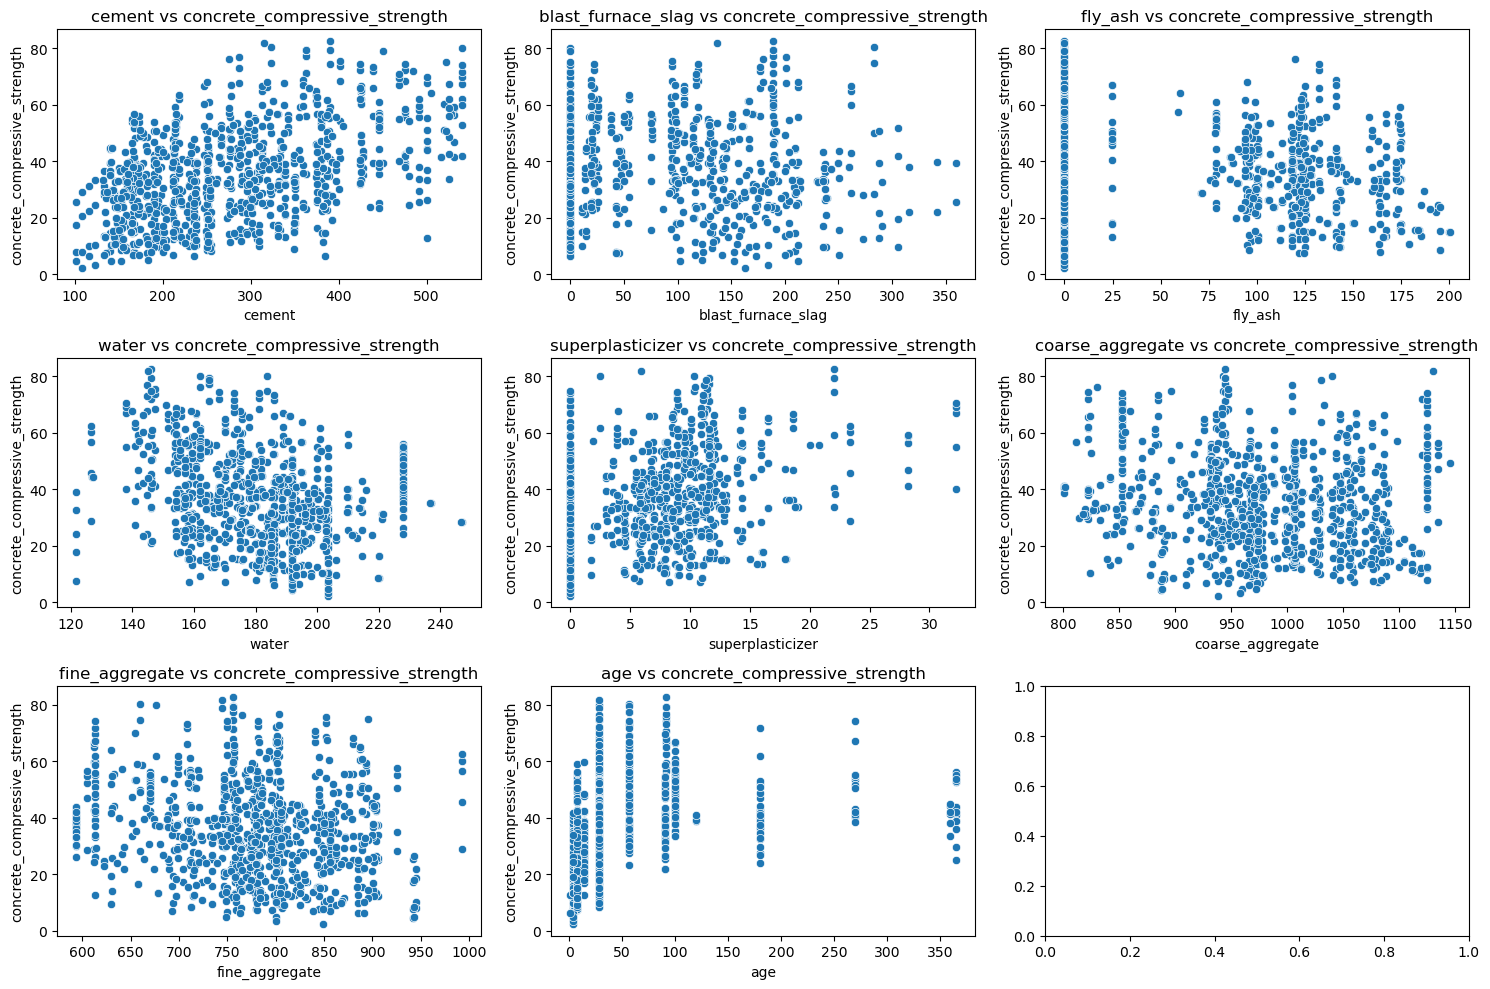

In [95]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Create scatter plots for each independent variable vs dependent variable
independent_cols = df.columns[:-1] 

for i, col in enumerate(independent_cols):
    row, col_num = divmod(i, 3)  # Get row and column for subplot grid
    sns.scatterplot(x=df[col], y=df['concrete_compressive_strength'], ax=axs[row, col_num])
    axs[row, col_num].set_title(f'{col} vs concrete_compressive_strength')
    axs[row, col_num].set_xlabel(col)
    axs[row, col_num].set_ylabel('concrete_compressive_strength')

# Hide any unused subplots (if any)
for j in range(i+1, 6):
    row, col_num = divmod(j, 3)
    fig.delaxes(axs[row, col_num])

# Adjust layout
plt.tight_layout()
plt.show()

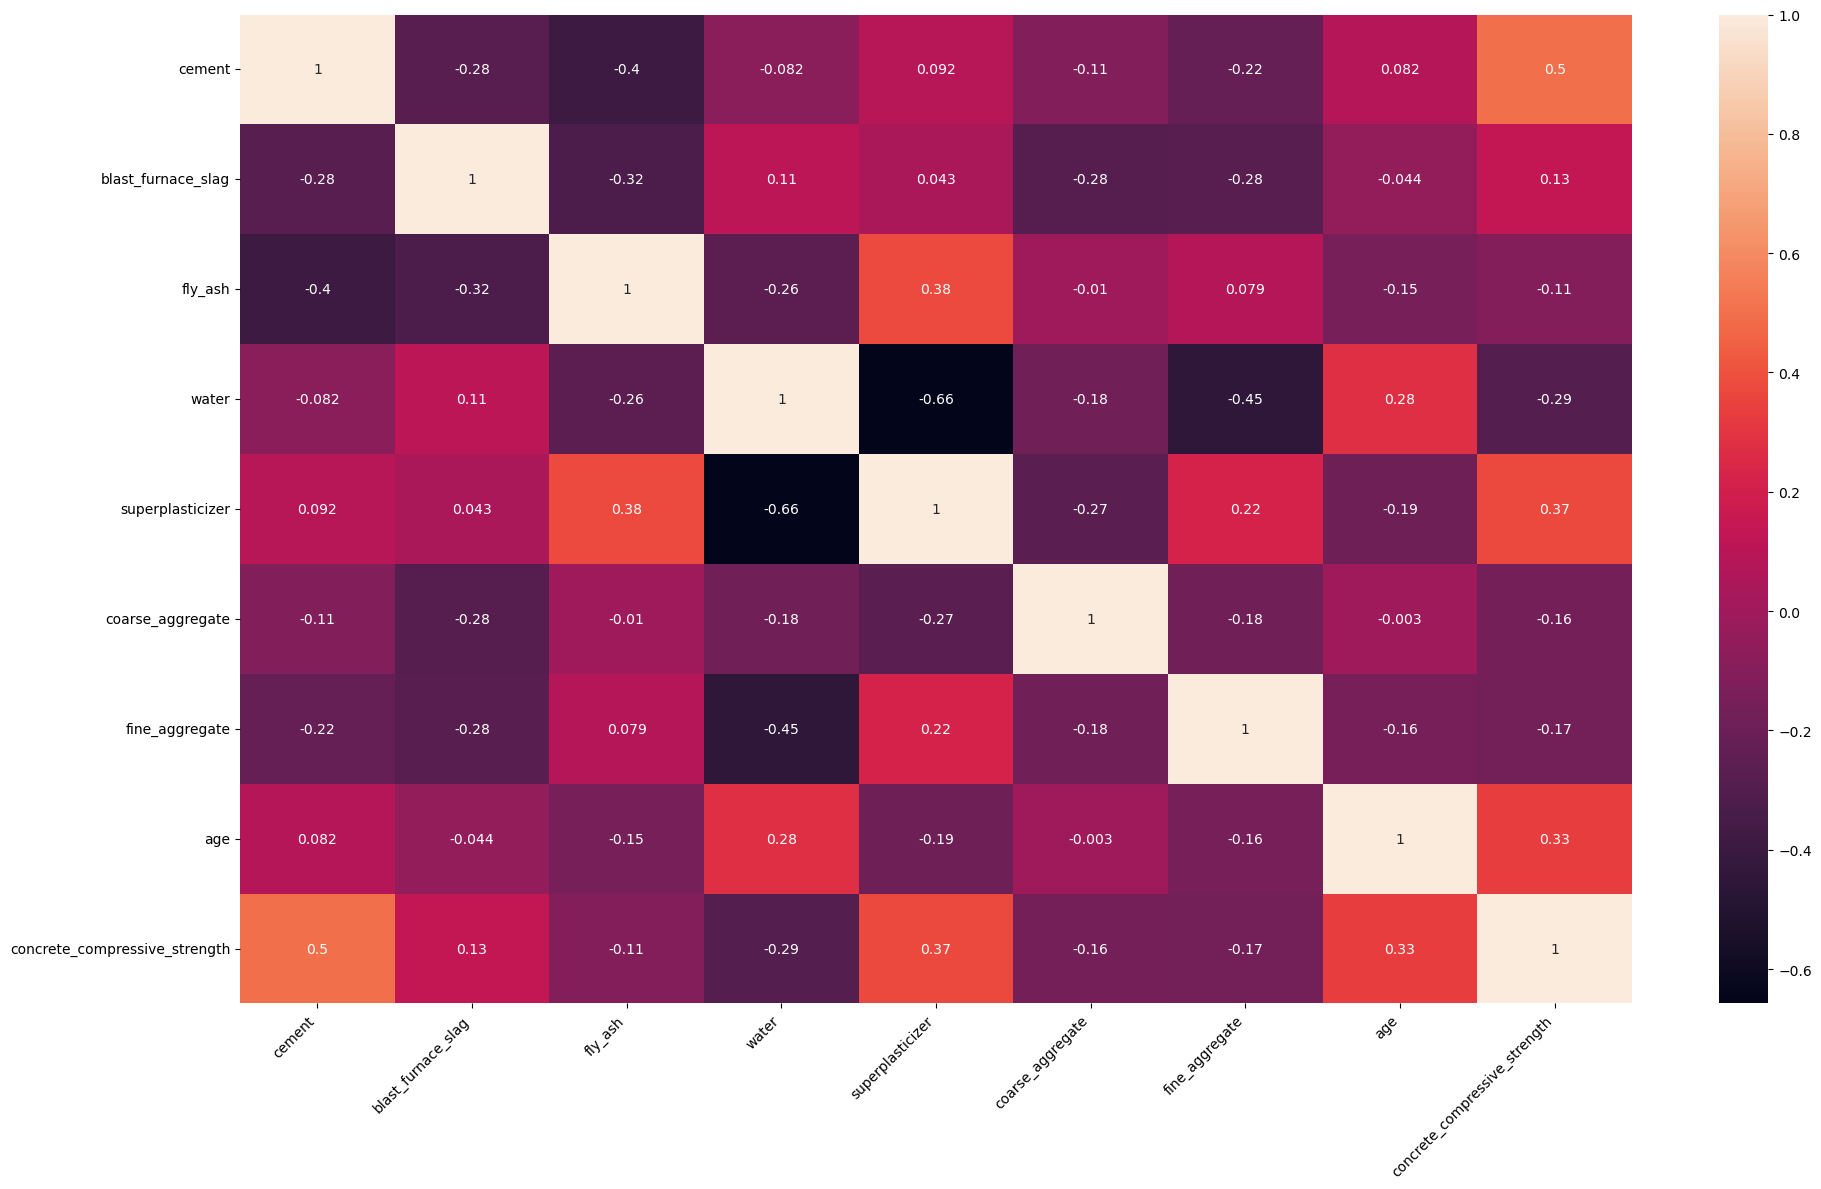

In [96]:
cm = df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### As we can observe there is strong positive correlation between the cement and compressive strength of concrete and negative correralation between water and compressive strength of the concrete.
#### We can add new feature called water/cement ratio which is important while calculating the compressive strength of the concrete


## Feature Engineering 

In [97]:
df['water']/df['cement']

0       0.300000
1       0.300000
2       0.685714
3       0.685714
4       0.966767
          ...   
1025    0.649783
1026    0.608318
1027    1.297643
1028    1.103708
1029    0.768877
Length: 1030, dtype: float64

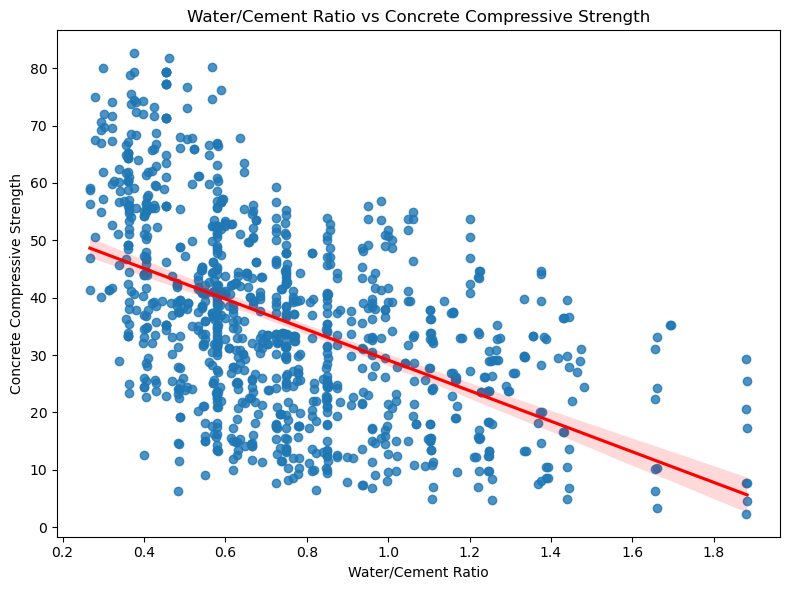

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create scatter plot for water/cement ratio vs concrete_compressive_strength
sns.regplot(x=df['water'] / df['cement'], y=df['concrete_compressive_strength'], ax=ax, scatter=True, 
            line_kws={"color":"red"})


# Set title and labels
ax.set_title('Water/Cement Ratio vs Concrete Compressive Strength')
ax.set_xlabel('Water/Cement Ratio')
ax.set_ylabel('Concrete Compressive Strength')

# Show the plot
plt.tight_layout()
plt.show()

#### As we can see the relationship between water/cement ratio and compressive strength is highly linear so we will be adding new feature as water/cement ratio.

In [99]:
df['water_cement_ratio'] = df['water']/df['cement']

In [100]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,water_cement_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


In [101]:
X = df.drop('concrete_compressive_strength',axis = 1)
y = df['concrete_compressive_strength']

In [102]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get a summary of the scaled data
print(X_scaled_df.describe())

            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean      0.409059            0.205609     0.270806     0.477374   
std       0.238599            0.240065     0.319825     0.170561   
min       0.000000            0.000000     0.000000     0.000000   
25%       0.206336            0.000000     0.000000     0.344249   
50%       0.390183            0.061213     0.000000     0.504792   
75%       0.566210            0.397746     0.591204     0.560703   
max       1.000000            1.000000     1.000000     1.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           0.192691          0.499764        0.450528     0.122698   
std            0.185523          0.226029        0.201144     0.173544   
min            0.000000          0.000000        0.000000     0.000000   
25%            0.

In [103]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate VIF for each feature in the scaled DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF values
print(vif_data)

              Feature        VIF
0              cement  15.571169
1  blast_furnace_slag   3.886603
2             fly_ash   3.976579
3               water  23.013309
4    superplasticizer   5.555348
5    coarse_aggregate   5.079022
6      fine_aggregate   6.940789
7                 age   1.673599
8  water_cement_ratio  21.822964


#### After Calculating the VIF of all the columns present in the dataset we found that water has the highest VIF value. So we will drop water from the dataframe.

In [104]:
X_scaled_df = X_scaled_df.drop('water',axis =1)

In [105]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF values
print(vif_data)

              Feature       VIF
0              cement  4.572794
1  blast_furnace_slag  3.886242
2             fly_ash  3.934909
3    superplasticizer  4.398835
4    coarse_aggregate  4.911425
5      fine_aggregate  6.683347
6                 age  1.579615
7  water_cement_ratio  9.709252


#### As we can the VIF values of all the columns are less than 10, so we are good to go.

In [106]:
X_train,X_test,y_train,y_test = X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (824, 8)
Test set size: (206, 8)


### Model Training

#### Linear Regression

In [107]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.6097728194811285, 0.6278082598376993)

In [108]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  95.90521171268522 RMSE:  9.793120631988826


In [109]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 49.940232,  46.199359,  20.436643,  14.174715,  12.282143,
        18.558116,  41.6434  , -13.096983])

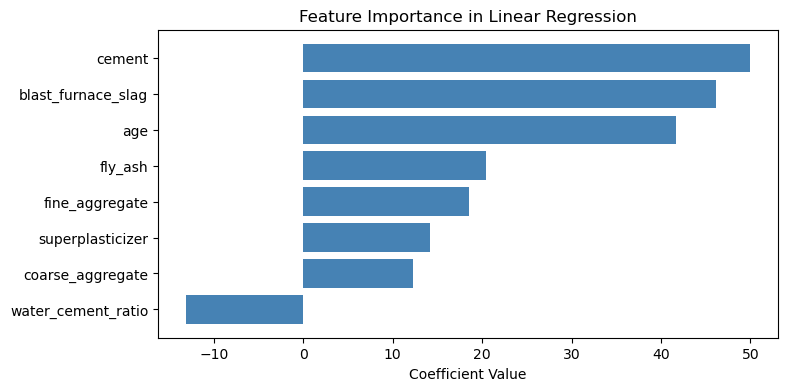

In [110]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

#### Ridge Regression

In [111]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.6059756855912531, 0.623943102211864)

In [112]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  96.90117352593496 RMSE:  9.843839369165618


#### XGBoost Regression

In [113]:
model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.8709028676003161

In [114]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  33.265348147955265 RMSE:  5.7676119970014685


#### XGBoost Model Tuning

In [115]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9044738795304155

In [116]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [134]:
model_xgb = XGBRegressor(n_estimator = 50,max_depth = 5,learning_rate = 0.1)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

0.9052312704946472

#### Decision Tree Regression

In [117]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.826758339946621

#### Decision Tree Model Tuning

In [118]:
model_dt = DecisionTreeRegressor()
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Different criteria to measure split quality
    'splitter': ['best', 'random'],              # Split strategy
    'max_depth': [None, 10, 20, 30],             # Limits for depth of the tree
    'min_samples_split': [2, 10, 20],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],              # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider for the best split
}

random_search = RandomizedSearchCV(model_dt, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')
random_search.fit(X_train, y_train)
random_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.7266955914903805

#### Random Forest Regression

In [119]:
model_rf = RandomForestRegressor(n_estimators=20, max_depth=3) 
model_rf.fit(X_train, y_train) 
score = model_rf.score(X_test, y_test)
score

0.6387842680206637

#### Decision Tree Model Tuning

In [120]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],     # Number of features to consider for the best split
    'bootstrap': [True, False]                    # Whether bootstrap samples are used when building trees
}
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)
random_search.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.9093635129245946

In [121]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': False}

In [129]:
model_rf = RandomForestRegressor(n_estimators=200, min_samples_split = 5, min_samples_leaf = 1, 
                                 max_features = 'log2',max_depth=40,bootstrap=False) 
model_rf.fit(X_train, y_train) 
score = model_rf.score(X_test, y_test)
score

0.8835834942689386

In [139]:
best_model = model_xgb

In [140]:
dump(best_model,'artifacts/ml_model.joblib')

['artifacts/ml_model.joblib']

In [141]:
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale' : X.columns.to_list()
}
dump(scaler_with_cols,'artifacts/scaler.joblib')

['artifacts/scaler.joblib']

In [142]:
X.columns.to_list()

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'water_cement_ratio']

In [143]:
model_xgb.fit(X_train, y_train)
print("Model fitted:", hasattr(model_xgb, 'feature_importances_'))


Model fitted: True
